## EDA on Haberman's Survival Data Set

### Survival of patients who had undergone surgery for breast cancer

In [28]:
#Importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Title: Haberman's Survival Data

Sources:
(a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu)
(b) Date: March 4, 1999

Past Usage:

Haberman, S. J. (1976). Generalized Residuals for Log-Linear
Models, Proceedings of the 9th International Biometrics
Conference, Boston, pp. 104-122.
Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984),
Graphical Models for Assessing Logistic Regression Models (with
discussion), Journal of the American Statistical Association 79:
61-83.
Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis,
Department of Statistics, University of Wisconsin, Madison, WI.
Relevant Information:
The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year
Missing Attribute Values: None

In [29]:
#Loading dataset
df=pd.read_csv('haberman.csv')
df.columns=['Age','Op_Year','axil_nodes','Surv_status']
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [30]:
df.head() #printing first five rows.

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          305 non-null    int64
 1   Op_Year      305 non-null    int64
 2   axil_nodes   305 non-null    int64
 3   Surv_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [32]:
df.count()#counting number of data points for each column.

Age            305
Op_Year        305
axil_nodes     305
Surv_status    305
dtype: int64

In [33]:
df.Age.head().value_counts()  #counting the frequency of first five ages.

31    2
30    2
33    1
Name: Age, dtype: int64

In [34]:
df.Surv_status.value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

224 people survived even after 5 years of surgery while 81 people died within 5 years

In [35]:
df.shape 

(305, 4)

305 observations and 4 features.

In [36]:
df.index 

RangeIndex(start=0, stop=305, step=1)

In [37]:
df.isna().sum()

Age            0
Op_Year        0
axil_nodes     0
Surv_status    0
dtype: int64

NO  missing data present

In [38]:
df.duplicated().sum()

17

In [39]:
#Removing duplicated values
df=df.drop_duplicates()
df

,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


Observations:
There are no missing values.
The Data is Imbalanced Dataset.
There are 17 duplicated values.

### Univariate Analysis

In [40]:
counts,bins=np.histogram(df.Age,bins=10)#density
counts


array([15, 25, 43, 51, 52, 38, 37, 18,  7,  2], dtype=int64)

In [14]:
bins

array([30. , 35.3, 40.6, 45.9, 51.2, 56.5, 61.8, 67.1, 72.4, 77.7, 83. ])

In [15]:
pdf=counts/sum(counts)
pdf

array([0.05208333, 0.08680556, 0.14930556, 0.17708333, 0.18055556,
       0.13194444, 0.12847222, 0.0625    , 0.02430556, 0.00694444])

In [16]:
cdf=np.cumsum(pdf)
cdf

array([0.05208333, 0.13888889, 0.28819444, 0.46527778, 0.64583333,
       0.77777778, 0.90625   , 0.96875   , 0.99305556, 1.        ])

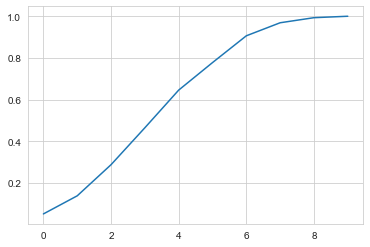

In [51]:
plt.plot(cdf)

### Plotting PDFs

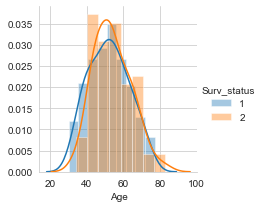

In [44]:
sns.FacetGrid(df,hue='Surv_status').map(sns.distplot,'Age').add_legend();
plt.show()

Observations:
    Max patients in the age range 40-60 have died within 5 years of operations.
    Max patients in the age range 50-60 have survived even after 5 years of operations.
    

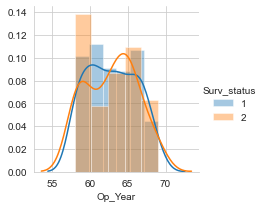

In [46]:
sns.FacetGrid(df,hue='Surv_status').map(sns.distplot,'Op_Year').add_legend();
plt.show()

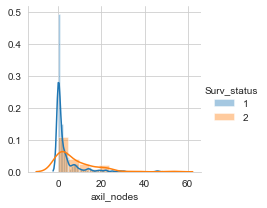

In [47]:
sns.FacetGrid(df,hue='Surv_status').map(sns.distplot,'axil_nodes').add_legend();
plt.show()

Observations: Patients with 0 axil nodes are the ones who survived more.

### Boxplot

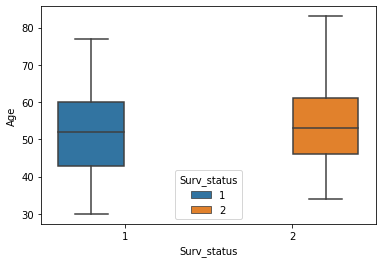

In [18]:
sns.boxplot('Surv_status','Age',data=df,hue='Surv_status')

Observations:
    1.The Age group is between 30 to 83.
    2.Most People from Age(at the time of operation) 43-60 have survived even after 5 years of operations.
    3.Most people from Age 45-60 have died within 5 years of operations.
    4.Most patients lie in the age group 43-60.
    5.Maximum patients are in the group of age 50-52.

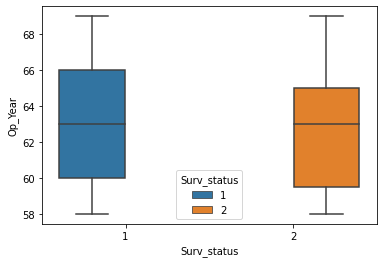

In [19]:
sns.boxplot('Surv_status','Op_Year',data=df,hue='Surv_status')

Observations: 
   1.Most operations were done in the year 58-66.



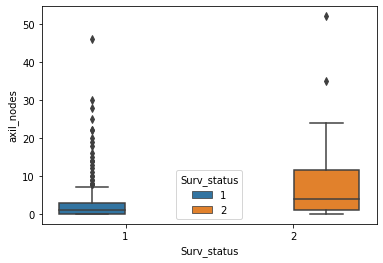

In [20]:
sns.boxplot('Surv_status','axil_nodes',data=df,hue='Surv_status')

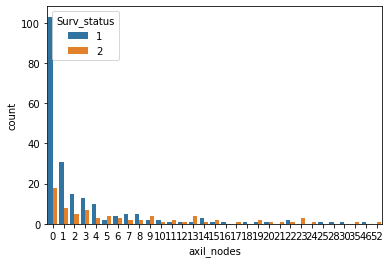

In [21]:
sns.countplot(data=df,x='axil_nodes',hue='Surv_status')

Observations: The Patients who don't have any positive axillary node are the maximum number patients who are survived.

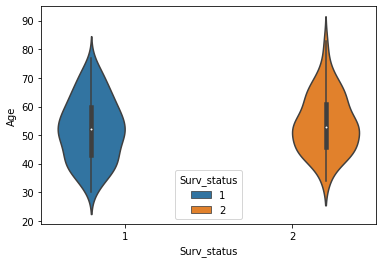

In [22]:
sns.violinplot('Surv_status','Age',data=df,hue='Surv_status')

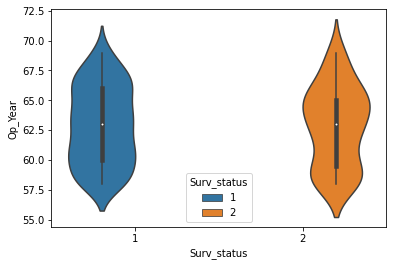

In [23]:
sns.violinplot('Surv_status','Op_Year',data=df,hue='Surv_status')

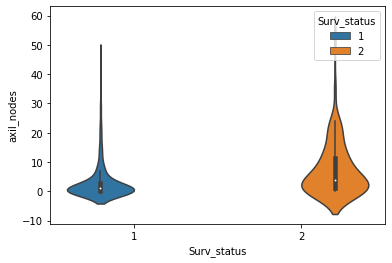

In [24]:
sns.violinplot('Surv_status','axil_nodes',data=df,hue='Surv_status')

### Bivariate Analysis

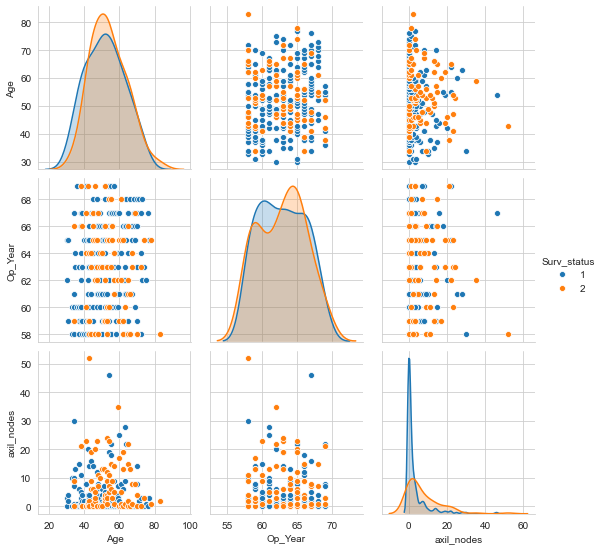

In [25]:
sns.set_style('whitegrid')
sns.pairplot(df,'Surv_status')
plt.show()

The diagonal elements are pdfs for each features.

Observation:
    There is high overlap between the data so it is difficult to find the correlation of features with the label data. 
    From the pdf of axil_nodes, patients with 0 axil nodes have survived.

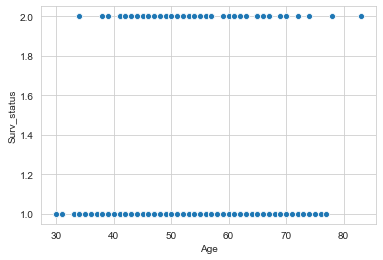

In [26]:
sns.set_style('whitegrid')
sns.scatterplot(df['Age'],df['Surv_status'])
plt.show()

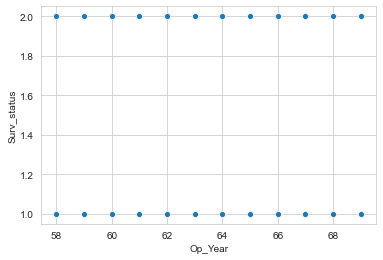

In [25]:
sns.set_style('whitegrid')
sns.scatterplot(df['Op_Year'],df['Surv_status'])
plt.show()

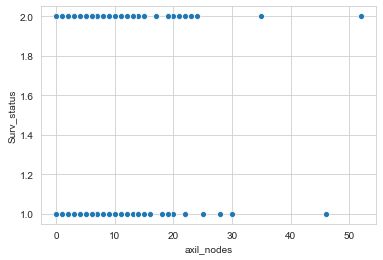

In [23]:
sns.set_style('whitegrid')
sns.scatterplot(df['axil_nodes'],df['Surv_status'])
plt.show()